In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = pd.read_csv('DOGE-USD.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB
None


,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


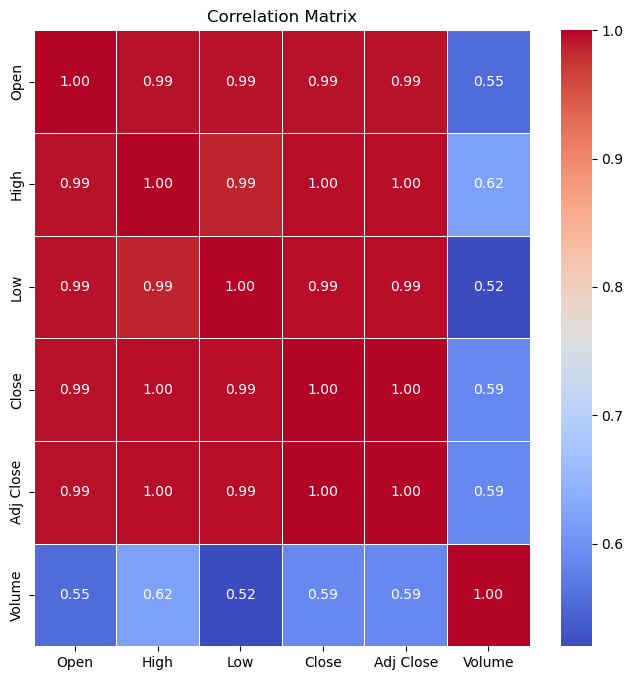

In [6]:
corr_matrix = data.corr(numeric_only = True)
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, annot= True, cmap = 'coolwarm', fmt='.2f', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [7]:
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
data.set_index('Date', inplace = True)
data.isnull().any()

C:\Users\Legion\AppData\Local\Temp\ipykernel_39204\111875156.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)


Open         True
High         True
Low          True
Close        True
Adj Close    True
Volume       True
dtype: bool

In [8]:
data.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [9]:
data = data.dropna()
print(data.isnull().sum())
data.describe()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


Text(0.5, 1.0, 'Date vs Close of 2021')

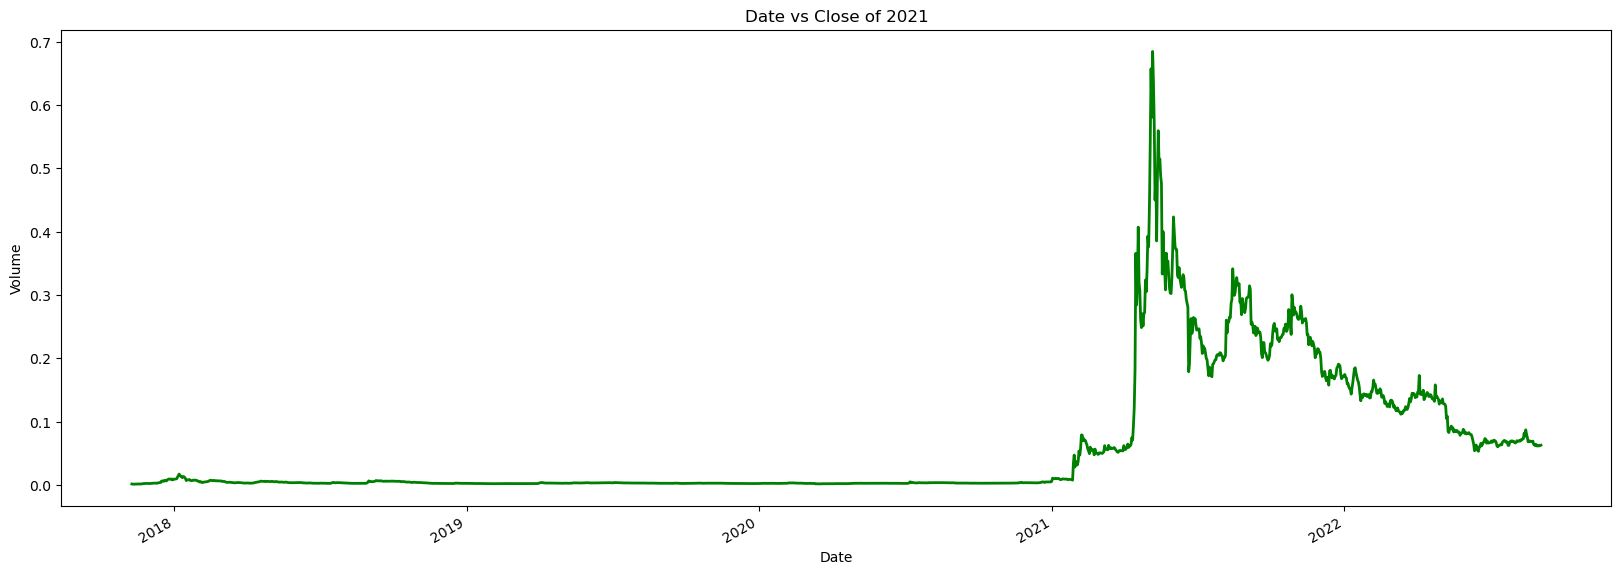

In [10]:
plt.figure(figsize=(20,7))
x = data.groupby('Date')['Close'].mean()
x.plot(linewidth = 2.0, color = 'g')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title("Date vs Close of 2021")

In [11]:
data['Gap'] = (data['High'] - data['Low']) * data['Volume']
data['y'] = data['High']/data['Volume']
data["z"] = data["Low"] / data["Volume"]
data["a"] = data["High"] / data["Low"]
data["b"] = (data["High"] / data["Low"]) * data["Volume"]
abs(data.corr()["Close"].sort_values(ascending=False))

C:\Users\Legion\AppData\Local\Temp\ipykernel_39204\2001806195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gap'] = (data['High'] - data['Low']) * data['Volume']
C:\Users\Legion\AppData\Local\Temp\ipykernel_39204\2001806195.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['y'] = data['High']/data['Volume']
C:\Users\Legion\AppData\Local\Temp\ipykernel_39204\2001806195.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

Close        1.000000
Adj Close    1.000000
High         0.995104
Low          0.994575
Open         0.992514
Volume       0.588678
b            0.456479
Gap          0.383333
a            0.172057
z            0.063251
y            0.063868
Name: Close, dtype: float64

In [12]:
data = data[['Close', 'Volume', 'Gap', 'a', 'b']]
data.head()

,Close,Volume,Gap,a,b
Date,,,,,
2017-11-09,0.001415,6259550.0,1464.73470,1.198137,7.499800e+06
2017-11-10,0.001163,4246520.0,1299.43512,1.272000,5.401573e+06
2017-11-11,0.001201,2231080.0,258.80528,1.101665,2.457903e+06
2017-11-12,0.001038,3288960.0,684.10368,1.207585,3.971698e+06
2017-11-13,0.001211,2481270.0,478.88511,1.189401,2.951226e+06


In [13]:
df2 = data.tail(30)
train = df2[:11]
test = df2[-19:]

print(train.shape, test.shape)

(11, 5) (19, 5)


In [32]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(endog = train['Close'], exog= train.drop('Close', axis = 1), order = (2,1,1))
sari = model.fit()
sari.summary()

C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Legion\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                   11
Model:               SARIMAX(2, 1, 1)   Log Likelihood                  47.663
Date:                Fri, 15 Nov 2024   AIC                            -79.326
Time:                        16:05:40   BIC                            -76.905
Sample:                    08-05-2022   HQIC                           -81.981
                         - 08-15-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Volume      7.491e-10   1.84e-10      4.077      0.000    3.89e-10    1.11e-09
Gap          1.13e-08   2.45e-09      4.615      0.000     6.5e-09    1.61e-08
a             -0.0073   5.05e-15  -1.44e+12      0.000      -0.007      -0.007
b          -7.541e-10   1.83e-10     -4.126      0.000   -1.11e-09   -3.96e-10
ar.L1              -0   8.45e-15         -0      1.000   -1.66e-14    1.66e-14
ar.L2               0   2.59e-14          0      1.000   -5.07e-14    5.07e-14
ma.L1         -0.5015   1.87e-14  -2.68e+13      0.000      -0.501      -0.501
sigma2      3.673e-07   5.67e-08      6.481      0.000    2.56e-07    4.78e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 0.51
Prob(Q):                              0.70   Prob(JB):                         0.77
Heteroskedasticity (H):               0.40   Skew:                            -0.54
Prob(H) (two-sided):                  0.47   Kurtosis:                         2.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.19e+29. Standard errors may be unstable.
"""

In [34]:
pred = sari.predict(start = 11, end = 29, exog = test.drop('Close', axis = 1))
pred

2022-08-16    0.097293
2022-08-17    0.083717
2022-08-18    0.075957
2022-08-19    0.069575
2022-08-20    0.071583
2022-08-21    0.072099
2022-08-22    0.071244
2022-08-23    0.072458
2022-08-24    0.072406
2022-08-25    0.071893
2022-08-26    0.068140
2022-08-27    0.071804
2022-08-28    0.071866
2022-08-29    0.071522
2022-08-30    0.070720
2022-08-31    0.071736
2022-09-01    0.071452
2022-09-02    0.072203
2022-09-03    0.072785
Freq: D, Name: predicted_mean, dtype: float64

<Axes: xlabel='Date'>

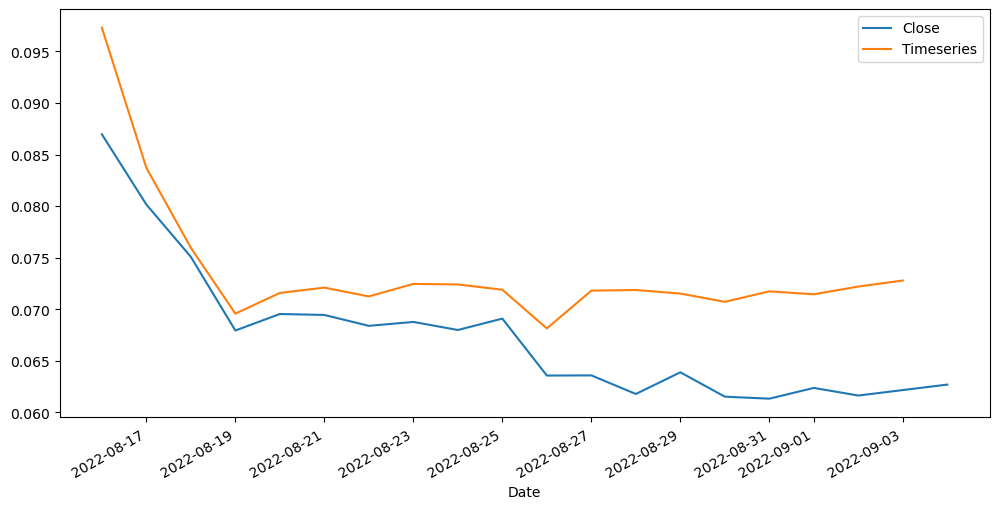

In [42]:
test['Close'].plot(legend = True, figsize = (12,6))
pred.plot(label = 'Timeseries', legend = True)